In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import joblib
import joblib
import shap

In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.1 MB/s eta 0:00:00


In [11]:
import numpy
import sklearn
import pandas
#import shap

print("NumPy version:", numpy.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Pandas version:", pandas.__version__)
#print("SHAP version:", shap.__version__)

NumPy version: 1.25.2
scikit-learn version: 1.2.2
Pandas version: 2.0.3


In [10]:
!python --version

Python 3.10.12


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/HM/DoAnHm/drebin.csv')
df2 = pd.read_csv('/content/drive/MyDrive/HM/DoAnHm/malgenome215.csv')
df3 = pd.read_csv('/content/drive/MyDrive/HM/DoAnHm/CICMalDroid2020.csv')

<ipython-input-17-190de00ecac3>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/HM/DoAnHm/drebin.csv')


In [ ]:
df1.shape

(15036, 216)

In [ ]:
df2.shape

(3799, 216)

In [ ]:
df3.shape

(11598, 471)

In [ ]:
df1.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [ ]:
df2.head()

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,S
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,S
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,S
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,S


In [ ]:
df3.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


# **Drebin**

In [ ]:
df1.dtypes

transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
ACCESS_FINE_LOCATION           int64
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
Length: 216, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
classes,count = np.unique(df1['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
df1 = df1.replace(classes,lbl_enc.fit_transform(classes))

##Dataset chứa các ký tự đặc biệt như ''?' và 'S'.Đặt chúng thành NaN và sử dụng dropna() để xóa chúng
df1=df1.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df1.isna().sum())))
df1.dropna(inplace=True)
for c in df1.columns:
    df1[c] = pd.to_numeric(df1[c])
df1


[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [ ]:
y = df1['class']
df1.drop('class',axis=1,inplace=True)


In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.25, random_state=42)

## **Phân loại dùng 215 feature**

In [ ]:
# Khởi tạo các bộ phân loại
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

# Tạo DataFrame để lưu trữ kết quả
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [ ]:
import time

# Tạo DataFrame để lưu trữ kết quả
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Testing Time'])

# Huấn luyện và kiểm tra từng bộ phân loại
for name, clf in classifiers.items():
    start_train_time = time.time()
    # Huấn luyện bộ phân loại
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time

    start_test_time = time.time()
    # Dự đoán trên tập kiểm tra
    y_pred = clf.predict(X_test)
    end_test_time = time.time()
    testing_time = end_test_time - start_test_time

    # Tính các số liệu đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Sử dụng 'binary' nếu nhãn là nhị phân
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # In kết quả của bộ phân loại hiện tại
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")
    print("\n" + "-"*50 + "\n")



# Giả sử bạn đã huấn luyện mô hình, ví dụ: model = RandomForestClassifier()
    if name == 'Random Forest':
        joblib.dump(clf, 'random_forest_model.pkl')

    # Lưu kết quả vào DataFrame
    results = pd.concat([results, pd.DataFrame([[name, accuracy, precision, recall, f1, training_time, testing_time]], columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Testing Time'])], ignore_index=True)

# Hiển thị tất cả các kết quả
print(results)


Classifier: Random Forest
Accuracy: 0.9867
Precision: 0.9935
Recall: 0.9709
F1 Score: 0.9820
Confusion Matrix:
[[2341    9]
 [  41 1367]]
Training Time: 1.1555 seconds
Testing Time: 0.0781 seconds

--------------------------------------------------

Classifier: Logistic Regression
Accuracy: 0.9761
Precision: 0.9707
Recall: 0.9652
F1 Score: 0.9679
Confusion Matrix:
[[2309   41]
 [  49 1359]]
Training Time: 0.3432 seconds
Testing Time: 0.0154 seconds

--------------------------------------------------

Classifier: Decision Tree
Accuracy: 0.9761
Precision: 0.9674
Recall: 0.9688
F1 Score: 0.9681
Confusion Matrix:
[[2304   46]
 [  44 1364]]
Training Time: 0.2286 seconds
Testing Time: 0.0094 seconds

--------------------------------------------------

Classifier: Gaussian Naive Bayes
Accuracy: 0.7166
Precision: 0.5713
Recall: 0.9759
F1 Score: 0.7207
Confusion Matrix:
[[1319 1031]
 [  34 1374]]
Training Time: 0.0545 seconds
Testing Time: 0.0199 seconds

---------------------------------------

## **Chọn 35 feature**

In [ ]:
dataset=df1

In [ ]:
dataset.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Tên của các đặc trưng ban đầu
initial_feature_names = list(dataset.columns)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier()

# Số lượng đặc trưng mục tiêu
target_features = 35

# Danh sách các đặc trưng đã bị xóa
deleted_features = []

# Lặp cho đến khi số lượng đặc trưng của Dataset giảm xuống dưới target_features
while dataset.shape[1] > target_features:

    # Huấn luyện mô hình với tập huấn luyện
    model.fit(X_train, y_train)

    # Tính độ quan trọng của từng đặc trưng
    importance = model.feature_importances_

    # Tìm chỉ số của đặc trưng có độ quan trọng thấp nhất
    i = np.argmin(importance)

    # Xóa đặc trưng đó khỏi Dataset
    dataset = np.delete(dataset, i, axis=1)

    # Xóa tên đặc trưng khỏi danh sách tên
    deleted_features.append(initial_feature_names.pop(i))

    # Cập nhật lại X_train và X_test
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

# In ra số lượng đặc trưng cuối cùng
print("Final number of features:", dataset.shape[1])

# In ra danh sách các đặc trưng đã bị xóa
print("Deleted features:", deleted_features)

# In ra danh sách các đặc trưng còn lại
print("Remaining features:", initial_feature_names)


Final number of features: 35
Deleted features: ['Process.start', 'WRITE_SOCIAL_STREAM', 'Runtime.loadLibrary', 'READ_SOCIAL_STREAM', 'MessengerService', 'BIND_VPN_SERVICE', 'WRITE_PROFILE', 'intent.action.RUN', 'ADD_VOICEMAIL', 'Context.bindService', 'BIND_ACCESSIBILITY_SERVICE', 'BIND_TEXT_SERVICE', 'SET_ACTIVITY_WATCHER', 'SET_TIME_ZONE', 'android.intent.action.CALL_BUTTON', 'MOUNT_FORMAT_FILESYSTEMS', 'REORDER_TASKS', 'INTERNAL_SYSTEM_WINDOW', 'INSTALL_LOCATION_PROVIDER', 'android.intent.action.BATTERY_LOW', 'SET_TIME', 'android.intent.action.BATTERY_OKAY', 'ACCOUNT_MANAGER', 'SET_ORIENTATION', 'SET_PROCESS_LIMIT', 'WRITE_USER_DICTIONARY', 'android.intent.action.CALL', 'DUMP', 'SUBSCRIBED_FEEDS_WRITE', 'android.intent.action.PACKAGE_RESTARTED', 'android.intent.action.PACKAGE_DATA_CLEARED', 'READ_FRAME_BUFFER', 'WRITE_CALL_LOG', 'CONTROL_LOCATION_UPDATES', 'SET_WALLPAPER_HINTS', 'BIND_APPWIDGET', 'android.intent.action.SET_WALLPAPER', 'BIND_DEVICE_ADMIN', 'UPDATE_DEVICE_STATS', 'andr

In [ ]:
dataset

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train_35, X_test_35, y_train_35, y_test_35 = train_test_split(dataset, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, KFold
# 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_np = y.values
results = []

for train_index, test_index in kf.split(dataset):
    X_train_35, X_test_35 = dataset[train_index], dataset[test_index]
    y_train_35, y_test_35 = y_np[train_index], y_np[test_index]

    model.fit(X_train_35, y_train_35)
    y_pred_35_10 = model.predict(X_test_35)

    accuracy = accuracy_score(y_test_35, y_pred_35_10)
    precision = precision_score(y_test_35, y_pred_35_10, average='binary')
    recall = recall_score(y_test_35, y_pred_35_10, average='binary')
    f1 = f1_score(y_test_35, y_pred_35_10, average='binary')

    # Lưu kết quả của fold hiện tại
    results.append({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # In kết quả của fold hiện tại
    print(f"Fold {len(results)}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n" + "-"*50 + "\n")

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Tính trung bình và độ lệch chuẩn cho các số liệu đánh giá
accuracy_mean = results_df['Accuracy'].mean()
accuracy_std = results_df['Accuracy'].std()

precision_mean = results_df['Precision'].mean()
precision_std = results_df['Precision'].std()

recall_mean = results_df['Recall'].mean()
recall_std = results_df['Recall'].std()

f1_mean = results_df['F1 Score'].mean()
f1_std = results_df['F1 Score'].std()

print("10-Fold Cross-Validation Results:")
print(f"Accuracy: Mean={accuracy_mean:.4f}, Std={accuracy_std:.4f}")
print(f"Precision: Mean={precision_mean:.4f}, Std={precision_std:.4f}")
print(f"Recall: Mean={recall_mean:.4f}, Std={recall_std:.4f}")
print(f"F1 Score: Mean={f1_mean:.4f}, Std={f1_std:.4f}")

Fold 1:
Accuracy: 0.9834
Precision: 0.9892
Recall: 0.9665
F1 Score: 0.9777

--------------------------------------------------

Fold 2:
Accuracy: 0.9814
Precision: 0.9817
Recall: 0.9675
F1 Score: 0.9745

--------------------------------------------------

Fold 3:
Accuracy: 0.9741
Precision: 0.9710
Recall: 0.9588
F1 Score: 0.9648

--------------------------------------------------

Fold 4:
Accuracy: 0.9867
Precision: 0.9885
Recall: 0.9736
F1 Score: 0.9810

--------------------------------------------------

Fold 5:
Accuracy: 0.9794
Precision: 0.9861
Recall: 0.9611
F1 Score: 0.9734

--------------------------------------------------

Fold 6:
Accuracy: 0.9814
Precision: 0.9891
Recall: 0.9611
F1 Score: 0.9749

--------------------------------------------------

Fold 7:
Accuracy: 0.9807
Precision: 0.9878
Recall: 0.9628
F1 Score: 0.9751

--------------------------------------------------

Fold 8:
Accuracy: 0.9780
Precision: 0.9767
Recall: 0.9598
F1 Score: 0.9682

----------------------------

In [ ]:
import time

# Tạo DataFrame để lưu trữ kết quả
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Testing Time'])

# Huấn luyện và kiểm tra từng bộ phân loại
for name, clf in classifiers.items():
    start_train_time = time.time()
    # Huấn luyện bộ phân loại
    clf.fit(X_train_35, y_train_35)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time

    start_test_time = time.time()
    # Dự đoán trên tập kiểm tra
    y_pred_35 = clf.predict(X_test_35)
    end_test_time = time.time()
    testing_time = end_test_time - start_test_time

    # Tính các số liệu đánh giá
    accuracy = accuracy_score(y_test_35, y_pred_35)
    precision = precision_score(y_test_35, y_pred_35, average='binary')  # Sử dụng 'binary' nếu nhãn là nhị phân
    recall = recall_score(y_test_35, y_pred_35, average='binary')
    f1 = f1_score(y_test_35, y_pred_35, average='binary')

    # In kết quả của bộ phân loại hiện tại
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_35, y_pred_35))
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")
    print("\n" + "-"*50 + "\n")

    # Lưu kết quả vào DataFrame
    results = pd.concat([results, pd.DataFrame([[name, accuracy, precision, recall, f1, training_time, testing_time]], columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Testing Time'])], ignore_index=True)

# Hiển thị tất cả các kết quả
print(results)

Classifier: Random Forest
Accuracy: 0.9806
Precision: 0.9862
Recall: 0.9616
F1 Score: 0.9738
Confusion Matrix:
[[2331   19]
 [  54 1354]]
Training Time: 0.7091 seconds
Testing Time: 0.0532 seconds

--------------------------------------------------

Classifier: Logistic Regression
Accuracy: 0.9548
Precision: 0.9447
Recall: 0.9339
F1 Score: 0.9393
Confusion Matrix:
[[2273   77]
 [  93 1315]]
Training Time: 0.0976 seconds
Testing Time: 0.0007 seconds

--------------------------------------------------

Classifier: Decision Tree
Accuracy: 0.9729
Precision: 0.9691
Recall: 0.9581
F1 Score: 0.9636
Confusion Matrix:
[[2307   43]
 [  59 1349]]
Training Time: 0.0509 seconds
Testing Time: 0.0015 seconds

--------------------------------------------------

Classifier: Gaussian Naive Bayes
Accuracy: 0.8840
Precision: 0.8123
Recall: 0.8977
F1 Score: 0.8529
Confusion Matrix:
[[2058  292]
 [ 144 1264]]
Training Time: 0.0130 seconds
Testing Time: 0.0022 seconds

---------------------------------------

In [ ]:
model_35 = RandomForestClassifier()
# Huấn luyện mô hình với tập huấn luyện
model_35.fit(X_train_35, y_train_35)

# Bắt đầu đo thời gian dự đoán
start_time = time.time()

# Dự đoán nhãn cho tập kiểm tra
y_pred_35 = model_35.predict(X_test_35)

# Kết thúc đo thời gian dự đoán
end_time = time.time()
test_time = end_time - start_time

# Tính toán các chỉ số hiệu suất
accuracy = accuracy_score(y_test_35, y_pred_35)
precision = precision_score(y_test_35, y_pred_35, average='weighted')
recall = recall_score(y_test_35, y_pred_35, average='weighted')
f1 = f1_score(y_test_35, y_pred_35, average='weighted')

# In ra các chỉ số hiệu suất và thời gian kiểm tra
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test Time: {test_time:.4f} seconds")


# Giả sử bạn đã huấn luyện mô hình, ví dụ: model = RandomForestClassifier()
joblib.dump(model_35, 'drebin_model.pkl')

Accuracy: 0.9792
Precision: 0.9792
Recall: 0.9792
F1 Score: 0.9792
Test Time: 0.0595 seconds


['drebin_model.pkl']

In [ ]:
!python --version


Python 3.10.12


In [ ]:

# Sử dụng SHAP để giải thích các dự đoán của mô hình
explainer_der = shap.TreeExplainer(model_35)
shap_values_der = explainer_der(X_train_35)


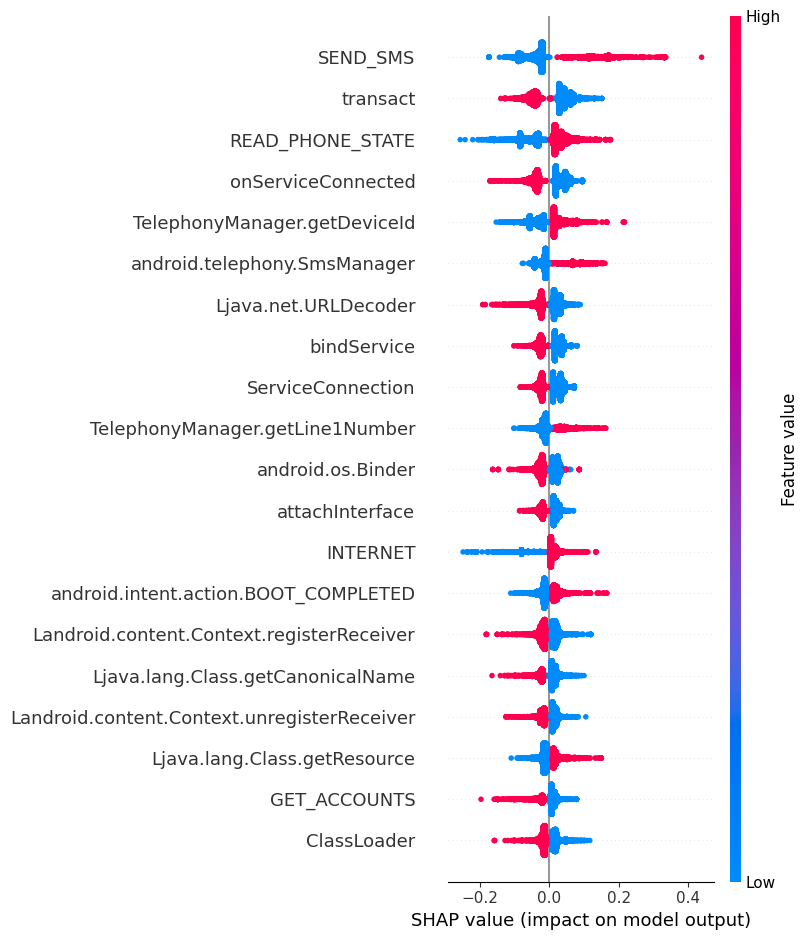

In [ ]:
X_train_35_df = pd.DataFrame(X_train_35, columns=initial_feature_names)
shap.summary_plot(shap_values_der[:, :, 1], features=X_train_35_df)

In [ ]:
shap.summary_plot(shap_values_der[:, :, 0], features=X_train_35_df)

In [ ]:
shap.summary_plot(shap_values_der, features=X_train_35_df)

# **malgenome215**

In [ ]:
df2.shape

(3799, 216)

In [ ]:
df2.dtypes

transact                                  int64
bindService                               int64
onServiceConnected                        int64
ServiceConnection                         int64
android.os.Binder                         int64
                                          ...  
GLOBAL_SEARCH                             int64
GET_PACKAGE_SIZE                          int64
SET_PREFERRED_APPLICATIONS                int64
android.intent.action.PACKAGE_CHANGED     int64
class                                    object
Length: 216, dtype: object

In [ ]:
df2['class'] = df2['class'].replace({'B': 0, 'S': 1})

df2

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3795,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3797,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_mal = df2['class']
df2.drop('class',axis=1,inplace=True)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train_mal, X_test_mal, y_train_mal, y_test_mal = train_test_split(df2, y_mal, test_size=0.25, random_state=42)

In [ ]:
dataset_mal=df2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Tên của các đặc trưng ban đầu
initial_feature_names = ["feature_{}".format(i) for i in range(dataset_mal.shape[1])]

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier()

# Số lượng đặc trưng mục tiêu
target_features = 35

# Danh sách các đặc trưng đã bị xóa
deleted_features = []

# Lặp cho đến khi số lượng đặc trưng của Dataset giảm xuống dưới target_features
while dataset_mal.shape[1] > target_features:

    # Huấn luyện mô hình với tập huấn luyện
    model.fit(X_train_mal, y_train_mal)

    # Tính độ quan trọng của từng đặc trưng
    importance = model.feature_importances_

    # Tìm chỉ số của đặc trưng có độ quan trọng thấp nhất
    i = np.argmin(importance)

    # Xóa đặc trưng đó khỏi Dataset
    dataset_mal = np.delete(dataset_mal, i, axis=1)

    # Xóa tên đặc trưng khỏi danh sách tên
    deleted_features.append(initial_feature_names.pop(i))

    # Cập nhật lại X_train và X_test
    X_train_mal, X_test_mal, y_train_mal, y_test_mal = train_test_split(dataset_mal, y_mal, test_size=0.2, random_state=42)

# In ra số lượng đặc trưng cuối cùng
print("Final number of features:", dataset_mal.shape[1])

# In ra danh sách các đặc trưng đã bị xóa
print("Deleted features:", deleted_features)

# In ra danh sách các đặc trưng còn lại
print("Remaining features:", initial_feature_names)


Final number of features: 35
Deleted features: ['feature_102', 'feature_152', 'feature_107', 'feature_138', 'feature_136', 'feature_143', 'feature_133', 'feature_160', 'feature_156', 'feature_169', 'feature_166', 'feature_165', 'feature_144', 'feature_94', 'feature_157', 'feature_173', 'feature_179', 'feature_172', 'feature_154', 'feature_141', 'feature_183', 'feature_175', 'feature_171', 'feature_197', 'feature_199', 'feature_184', 'feature_204', 'feature_196', 'feature_207', 'feature_211', 'feature_185', 'feature_134', 'feature_164', 'feature_137', 'feature_153', 'feature_142', 'feature_115', 'feature_170', 'feature_182', 'feature_128', 'feature_159', 'feature_135', 'feature_85', 'feature_105', 'feature_191', 'feature_158', 'feature_132', 'feature_177', 'feature_129', 'feature_76', 'feature_93', 'feature_147', 'feature_209', 'feature_181', 'feature_57', 'feature_123', 'feature_124', 'feature_126', 'feature_65', 'feature_114', 'feature_149', 'feature_106', 'feature_150', 'feature_71',

In [ ]:
dataset_mal

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train_mal, X_test_mal, y_train_mal, y_test_mal = train_test_split(dataset_mal, y_mal, test_size=0.25, random_state=42)

In [ ]:
model_mal = RandomForestClassifier()
# Huấn luyện mô hình với tập huấn luyện
model_mal.fit(X_train_mal, y_train_mal)

# Bắt đầu đo thời gian dự đoán
start_time = time.time()

# Dự đoán nhãn cho tập kiểm tra
y_pred_mal = model_mal.predict(X_test_mal)

# Kết thúc đo thời gian dự đoán
end_time = time.time()
test_time = end_time - start_time

# Tính toán các chỉ số hiệu suất
accuracy = accuracy_score(y_test_mal, y_pred_mal)
precision = precision_score(y_test_mal, y_pred_mal, average='weighted')
recall = recall_score(y_test_mal, y_pred_mal, average='weighted')
f1 = f1_score(y_test_mal, y_pred_mal, average='weighted')

# In ra các chỉ số hiệu suất và thời gian kiểm tra
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test Time: {test_time:.4f} seconds")

Accuracy: 0.9884
Precision: 0.9885
Recall: 0.9884
F1 Score: 0.9884
Test Time: 0.0149 seconds


# **CIC**

In [ ]:
df3.shape

(11598, 471)

In [ ]:
df3.dtypes

ACCESS_PERSONAL_INFO___    int64
ALTER_PHONE_STATE___       int64
ANTI_DEBUG_____            int64
CREATE_FOLDER_____         int64
CREATE_PROCESS`_____       int64
                           ...  
watchRotation              int64
windowGainedFocus          int64
write                      int64
writev                     int64
Class                      int64
Length: 471, dtype: object

In [ ]:
df3["Class"].unique()

array([1, 2, 3, 4, 5])

In [ ]:
y_cic = df3['Class']
df3.drop('Class',axis=1,inplace=True)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train_cic, X_test_cic, y_train_cic, y_test_cic = train_test_split(df3, y_cic, test_size=0.25, random_state=42)

In [ ]:
dataset_cic=df3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Tên của các đặc trưng ban đầu
initial_feature_names = ["feature_{}".format(i) for i in range(dataset_cic.shape[1])]

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier()

# Số lượng đặc trưng mục tiêu
target_features = 35

# Danh sách các đặc trưng đã bị xóa
deleted_features = []

# Lặp cho đến khi số lượng đặc trưng của Dataset giảm xuống dưới target_features
while dataset_cic.shape[1] > target_features:

    # Huấn luyện mô hình với tập huấn luyện
    model.fit(X_train_cic, y_train_cic)

    # Tính độ quan trọng của từng đặc trưng
    importance = model.feature_importances_

    # Tìm chỉ số của đặc trưng có độ quan trọng thấp nhất
    i = np.argmin(importance)

    # Xóa đặc trưng đó khỏi Dataset
    dataset_cic = np.delete(dataset_cic, i, axis=1)

    # Xóa tên đặc trưng khỏi danh sách tên
    deleted_features.append(initial_feature_names.pop(i))

    # Cập nhật lại X_train và X_test
    X_train_cic, X_test_cic, y_train_cic, y_test_cic = train_test_split(dataset_cic, y_cic, test_size=0.2, random_state=42)

# In ra số lượng đặc trưng cuối cùng
print("Final number of features:", dataset_cic.shape[1])

# In ra danh sách các đặc trưng đã bị xóa
print("Deleted features:", deleted_features)

# In ra danh sách các đặc trưng còn lại
print("Remaining features:", initial_feature_names)


Final number of features: 35
Deleted features: ['feature_17', 'feature_41', 'feature_27', 'feature_45', 'feature_43', 'feature_46', 'feature_29', 'feature_50', 'feature_51', 'feature_56', 'feature_57', 'feature_58', 'feature_66', 'feature_73', 'feature_71', 'feature_64', 'feature_1', 'feature_74', 'feature_80', 'feature_81', 'feature_75', 'feature_91', 'feature_67', 'feature_103', 'feature_94', 'feature_49', 'feature_111', 'feature_87', 'feature_108', 'feature_117', 'feature_121', 'feature_127', 'feature_125', 'feature_129', 'feature_136', 'feature_137', 'feature_134', 'feature_140', 'feature_144', 'feature_152', 'feature_156', 'feature_157', 'feature_164', 'feature_154', 'feature_167', 'feature_169', 'feature_170', 'feature_171', 'feature_174', 'feature_153', 'feature_163', 'feature_176', 'feature_190', 'feature_183', 'feature_180', 'feature_147', 'feature_193', 'feature_188', 'feature_191', 'feature_175', 'feature_197', 'feature_178', 'feature_195', 'feature_205', 'feature_214', 'fea

In [ ]:
# Bước 2: Chuyển đổi mảng NumPy thành DataFrame (nếu cần)
dataset_cic_df = pd.DataFrame(dataset_cic, columns=initial_feature_names)
file_path = '/content/drive/MyDrive/HM/DoAnHm/dataset_cic.csv'  # Thay đổi đường dẫn tùy thuộc vào vị trí bạn muốn lưu tệp
dataset_cic_df.to_csv(file_path, index=False)

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 75% và 25%
X_train_cic, X_test_cic, y_train_cic, y_test_cic = train_test_split(dataset_cic, y_cic, test_size=0.25, random_state=42)

In [ ]:
model = RandomForestClassifier()
# Huấn luyện mô hình với tập huấn luyện
model.fit(X_train_cic, y_train_cic)

# Bắt đầu đo thời gian dự đoán
start_time = time.time()

# Dự đoán nhãn cho tập kiểm tra
y_pred_cic = model.predict(X_test_cic)

# Kết thúc đo thời gian dự đoán
end_time = time.time()
test_time = end_time - start_time

# Tính toán các chỉ số hiệu suất
accuracy = accuracy_score(y_test_cic, y_pred_cic)
precision = precision_score(y_test_cic, y_pred_cic, average='weighted')
recall = recall_score(y_test_cic, y_pred_cic, average='weighted')
f1 = f1_score(y_test_cic, y_pred_cic, average='weighted')

# In ra các chỉ số hiệu suất và thời gian kiểm tra
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test Time: {test_time:.4f} seconds")

Accuracy: 0.9407
Precision: 0.9416
Recall: 0.9407
F1 Score: 0.9407
Test Time: 0.0736 seconds


In [ ]:
!pip install shap scikit-learn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
import shap
# Sử dụng SHAP để giải thích các dự đoán của mô hình
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train_cic)



In [ ]:
print(shap_values.shape)

(8698, 35, 5)


In [ ]:
shap_values[0]

.values =
array([[-6.54300667e-03,  7.08442001e-03, -3.75697620e-03,
         4.46295891e-02, -4.14140263e-02],
       [-6.05641760e-03, -9.75417136e-03, -2.30867624e-02,
         4.25622162e-02, -3.66486488e-03],
       [ 2.87875289e-03, -6.42613043e-03, -1.27794756e-02,
         1.02241046e-02,  6.10274856e-03],
       [-1.05066156e-02, -4.01501849e-03, -3.09046638e-02,
         4.31392320e-02,  2.28706597e-03],
       [-1.23315709e-03,  6.75371566e-04, -4.54720480e-03,
         7.56986831e-03, -2.46487799e-03],
       [ 7.29594529e-03, -4.17085935e-03, -1.33464786e-02,
         9.46777374e-03,  7.53618961e-04],
       [-1.28503331e-03, -1.34458713e-03, -5.84236610e-03,
         9.06245638e-03, -5.90469832e-04],
       [ 9.70576641e-03,  1.84679038e-03, -8.61303625e-03,
        -6.51273511e-03,  3.57321457e-03],
       [-9.45597083e-03, -3.44628837e-03, -9.03453493e-03,
         1.91293939e-02,  2.80740028e-03],
       [-3.65969600e-02, -2.61620270e-02, -1.00370302e-02,
         9.29

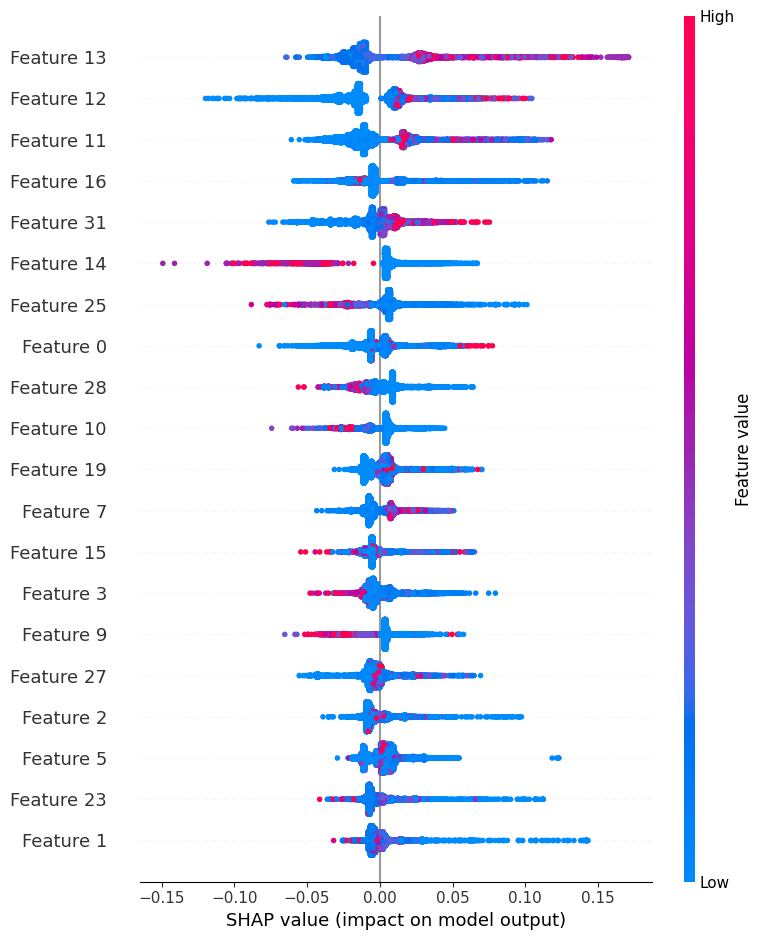

In [ ]:
shap.summary_plot(shap_values[:, :, 0], features=X_train_cic)

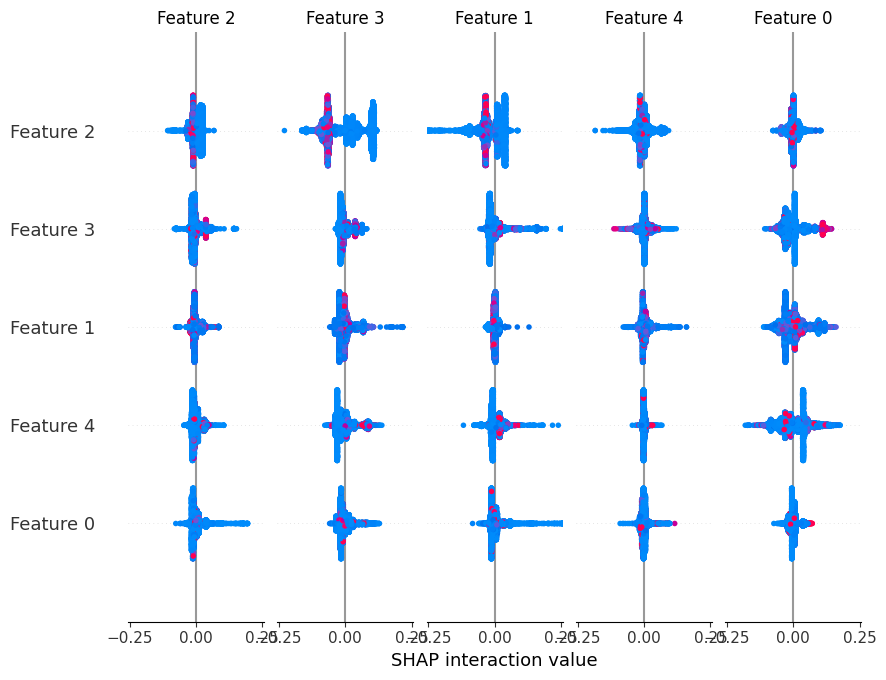

In [ ]:
# Vẽ biểu đồ SHAP cho tất cả các đặc trưng
shap.summary_plot(shap_values, features=X_train_cic)
